<a href="https://colab.research.google.com/github/Eugeg94/PrimeraEntrega-Gonzalez.ipynb/blob/main/Data_Wrangling%2BGonzalez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive
import os
drive.mount('/content/drive')
import os
print(os.getcwd())
os.chdir("/content/drive/My Drive")
print(os.getcwd())

Mounted at /content/drive
/content
/content/drive/My Drive


# Obtención de Datos

Se ha solicitado un analisis de los indices WBL que se adjuntarán desde el drive.

In [2]:
df1= pd.read_excel("/content/drive/MyDrive/Datasetwl.xlsx")

# Overview de Datos

In [3]:
df1.head()

,Economy,Economy Code,ISO Code,Region,Income Group,Report Year,WBL INDEX,MOBILITY,Can a woman choose where to live in the same way as a man?,Can a woman travel outside her home in the same way as a man?,...,Do men and women have equal ownership rights to immovable property?,Do sons and daughters have equal rights to inherit assets from their parents?,Do male and female surviving spouses have equal rights to inherit assets?,Does the law grant spouses equal administrative authority over assets during marriage?,Does the law provide for the valuation of nonmonetary contributions?,PENSION,Is the age at which men and women can retire with full pension benefits the same?,Is the age at which men and women can retire with partial pension benefits the same?,Is the mandatory retirement age for men and women the same?,Are periods of absence due to childcare accounted for in pension benefits?
0,Afghanistan,AFG,AFG,South Asia,Low income,1971,26.25,25,No,No,...,Yes,No,No,Yes,No,25,No,No,Yes,No
1,Afghanistan,AFG,AFG,South Asia,Low income,1972,26.25,25,No,No,...,Yes,No,No,Yes,No,25,No,No,Yes,No
2,Afghanistan,AFG,AFG,South Asia,Low income,1973,26.25,25,No,No,...,Yes,No,No,Yes,No,25,No,No,Yes,No
3,Afghanistan,AFG,AFG,South Asia,Low income,1974,26.25,25,No,No,...,Yes,No,No,Yes,No,25,No,No,Yes,No
4,Afghanistan,AFG,AFG,South Asia,Low income,1975,26.25,25,No,No,...,Yes,No,No,Yes,No,25,No,No,Yes,No


In [4]:
print(df1.shape)

(10070, 55)


# Exploracion Df1


In [5]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10070 entries, 0 to 10069
Data columns (total 55 columns):
 #   Column                                                                                  Non-Null Count  Dtype  
---  ------                                                                                  --------------  -----  
 0   Economy                                                                                 10070 non-null  object 
 1   Economy Code                                                                            10070 non-null  object 
 2   ISO Code                                                                                10070 non-null  object 
 3   Region                                                                                  10070 non-null  object 
 4   Income Group                                                                            10070 non-null  object 
 5   Report Year                                                        

# Borrado de Duplicados

In [6]:
print(df1.shape)
df1= df1.drop_duplicates()
print(df1.shape)


(10070, 55)
(10070, 55)


# Analisis de Nulos

In [46]:
pd.set_option('display.max_rows', None) 
serie=(df1.isnull().sum()/df1.shape[0])*100
serie=serie.sort_values(ascending=False)
serie= serie[serie>0]
serie

Series([], dtype: float64)

In [47]:
pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<Axes: >

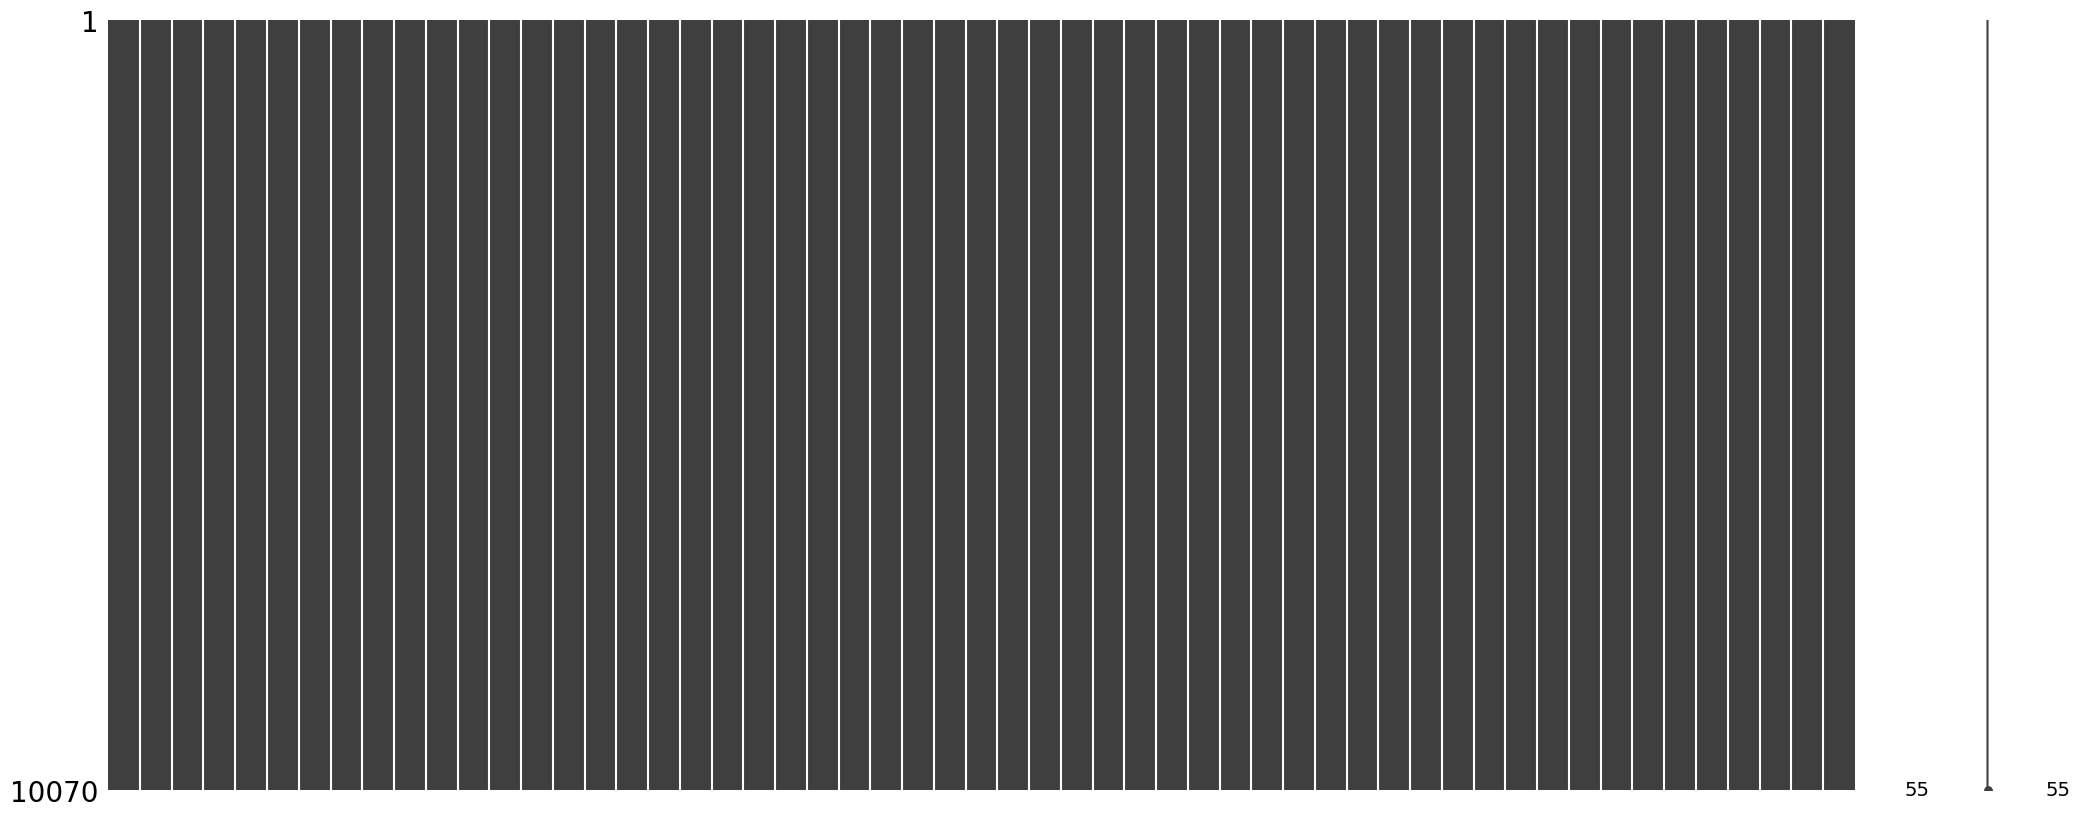

In [10]:
import missingno as msno
msno.matrix(df1)

/usr/local/lib/python3.9/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/usr/local/lib/python3.9/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<Axes: >

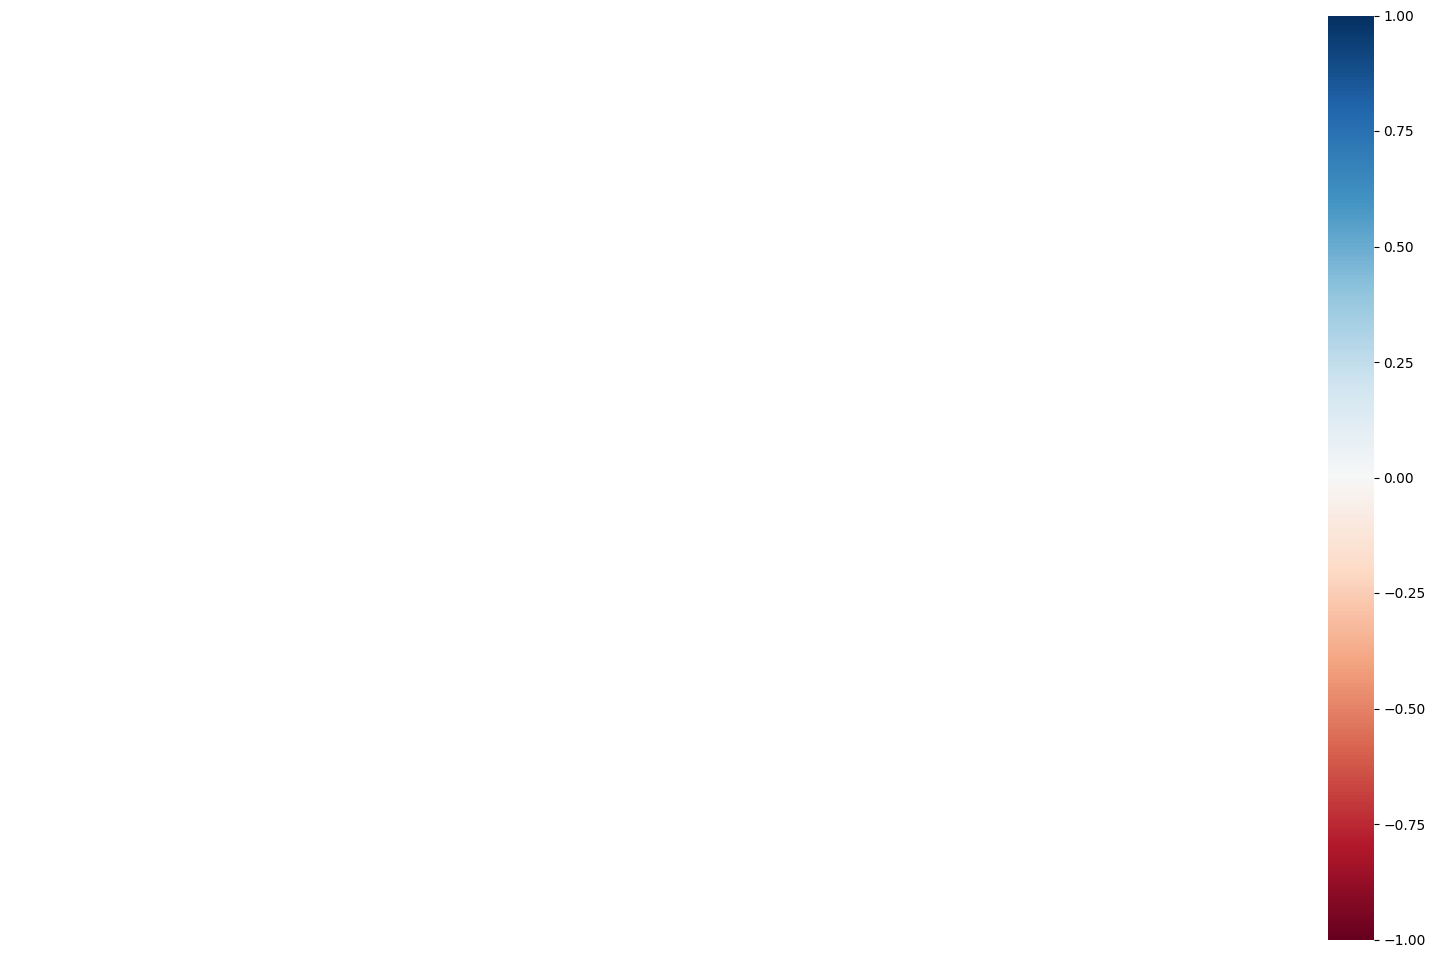

In [11]:
msno.heatmap(df1)

/usr/local/lib/python3.9/dist-packages/scipy/cluster/hierarchy.py:2876: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim([dvw, 0])


<Axes: >

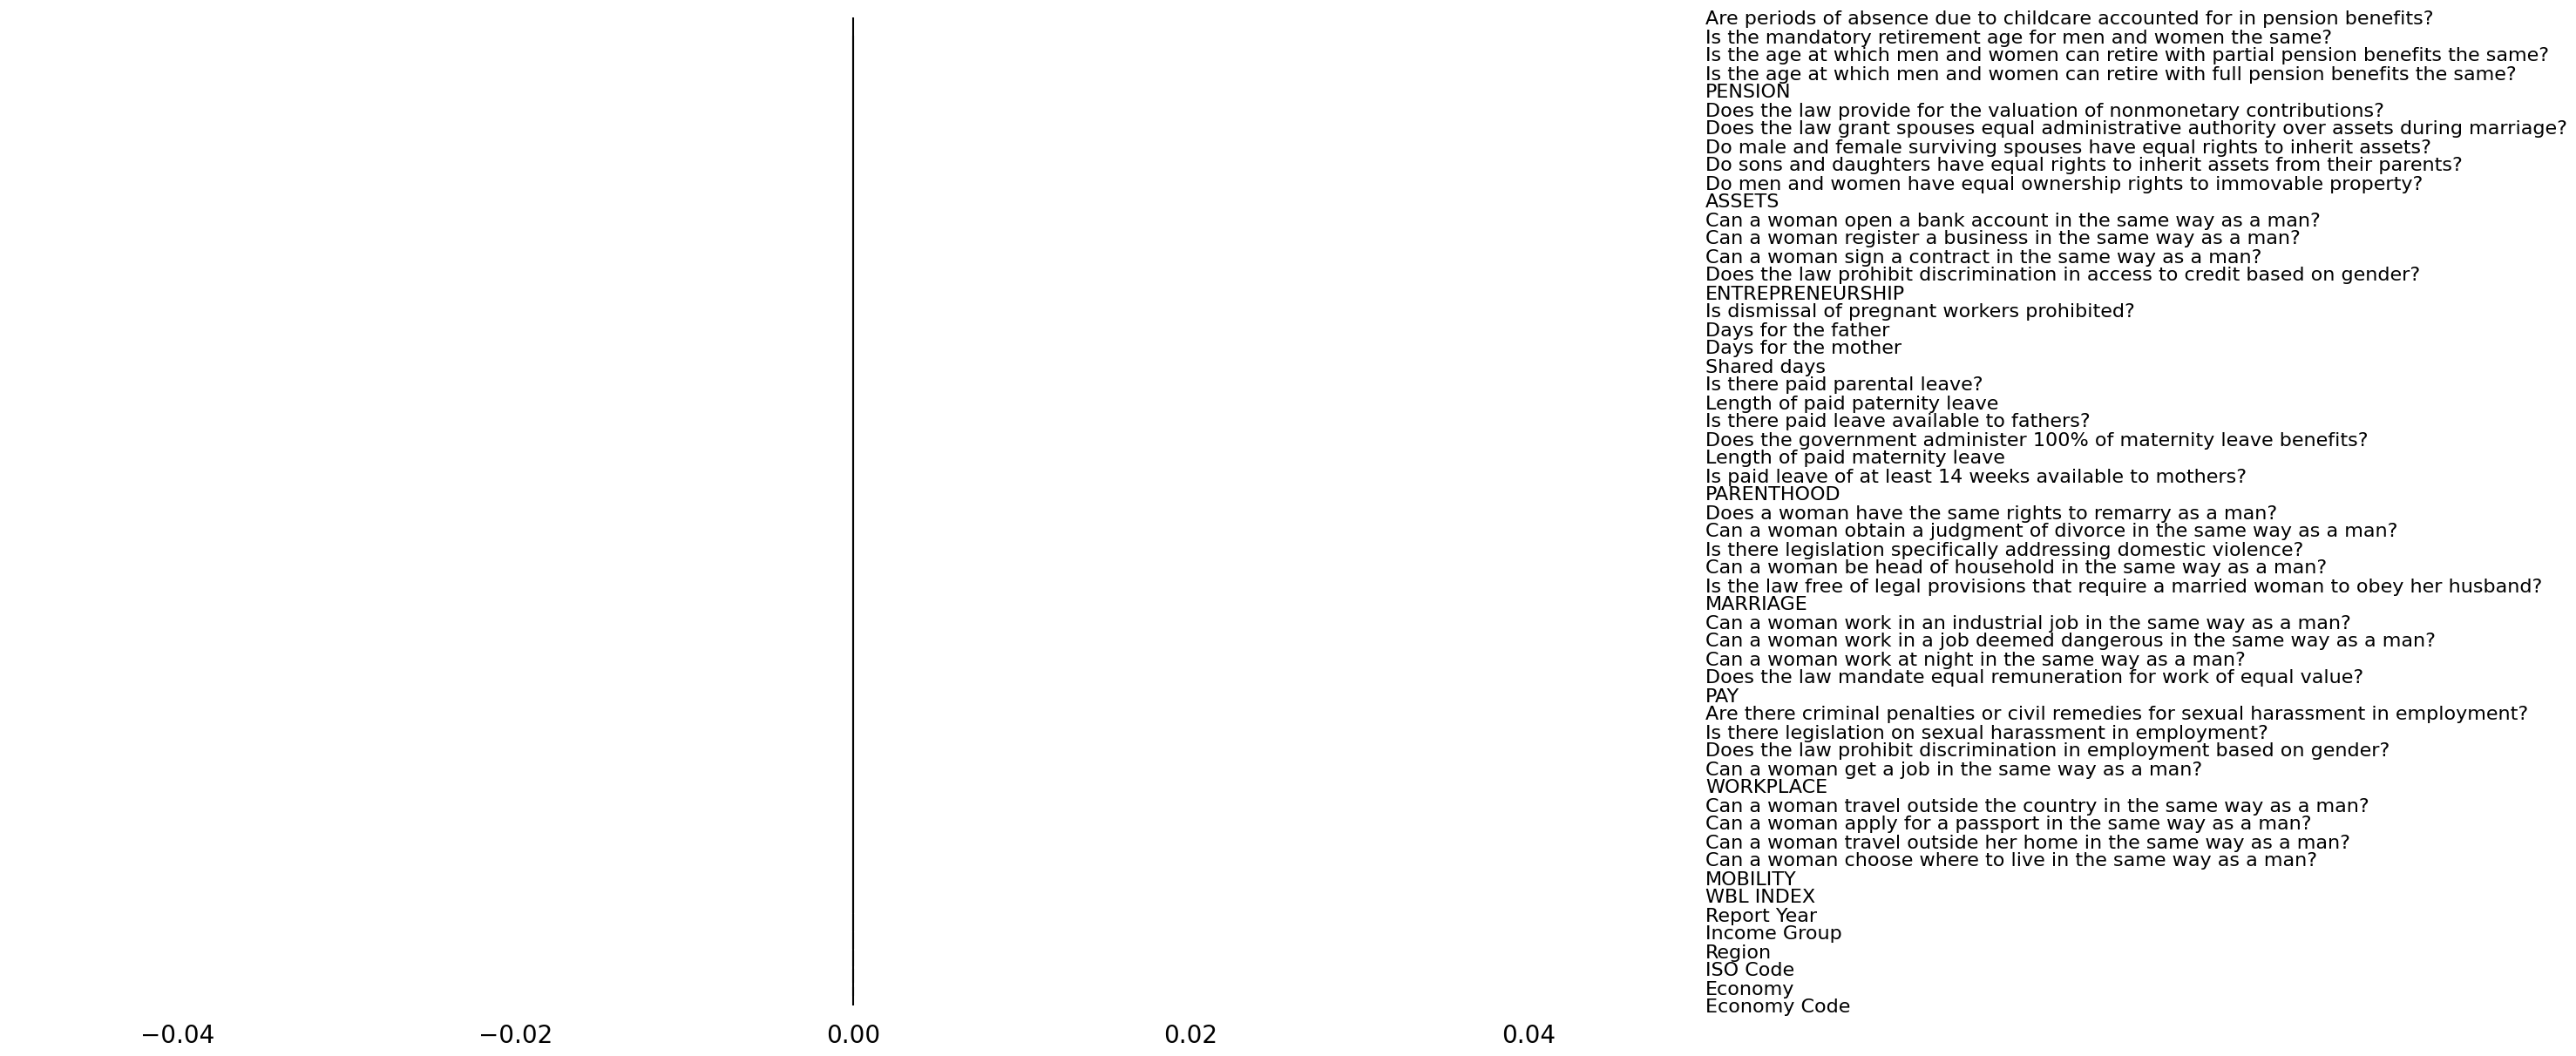

In [12]:
msno.dendrogram(df1)

In [14]:
df1.PAY.value_counts() # Decision: borrar

75     2559
25     2447
50     2354
0      1619
100    1091
Name: PAY, dtype: int64

In [15]:
df1.PARENTHOOD.value_counts() # Decision: borrar

0      2939
20     2138
60     1978
40     1490
80     1067
100     458
Name: PARENTHOOD, dtype: int64

In [23]:
df1.ASSETS.value_counts()# Decision: Reemplazar con alguna tecnica 

100    4641
40     2044
60     1487
80     1291
0       382
20      225
Name: ASSETS, dtype: int64

In [24]:
df1.PENSION.value_counts()# Decision: Reemplazar con alguna tecnica

75     3250
25     2411
100    2220
50     1896
0       293
Name: PENSION, dtype: int64

In [26]:
df1.shape

(10070, 55)

# Borrado

In [50]:
col_del=['PAY','PARENTHOOD', 'Shared days', 'Days for the mother', 'Days for the father',  'Length of paid maternity leave','Length of paid paternity leave'  ] # Columnas a borrar que no aportan
col_inter= ['PENSION', 'ASSETS'] # Columnas a interpolar

In [51]:
df1_x=df1.drop(labels=col_del, axis=1) # Borrando las columnas en col_del
df1_x.columns # Verificando las columnas que quedaron

Index(['Economy', 'Economy Code', 'ISO Code', 'Region', 'Income Group',
       'Report Year', 'WBL INDEX', 'MOBILITY',
       'Can a woman choose where to live in the same way as a man?',
       'Can a woman travel outside her home in the same way as a man?',
       'Can a woman apply for a passport in the same way as a man?',
       'Can a woman travel outside the country in the same way as a man?',
       'WORKPLACE', 'Can a woman get a job in the same way as a man?',
       'Does the law prohibit discrimination in employment based on gender?',
       'Is there legislation on sexual harassment in employment?',
       'Are there criminal penalties or civil remedies for sexual harassment in employment?',
       'Does the law mandate equal remuneration for work of equal value?',
       'Can a woman work at night in the same way as a man?',
       'Can a woman work in a job deemed dangerous in the same way as a man?',
       'Can a woman work in an industrial job in the same way as a man

# Mediana

In [31]:
for i in col_inter: # reemplazar por la mediana en las columnas numericas en col_inter
  df1_x[i] = df1_x[i].fillna(df1_x[i].median())

In [33]:
df1_x.PENSION.isnull().sum() # Verificar que funciono

0

In [42]:
col_cat= ['MARRIAGE','Is the law free of legal provisions that require a married woman to obey her husband?',
       'Can a woman be head of household in the same way as a man?',
       'Is there legislation specifically addressing domestic violence?',
       'Can a woman obtain a judgment of divorce in the same way as a man?',
       'Does a woman have the same rights to remarry as a man?',
       'Is paid leave of at least 14 weeks available to mothers?',
       'Length of paid maternity leave',
       'Does the government administer 100% of maternity leave benefits?',
       'Is there paid leave available to fathers?',
       'Length of paid paternity leave', 'Is there paid parental leave?',
       'Is dismissal of pregnant workers prohibited?',]

In [35]:
for i in col_cat: # Reemplazar los vacios por Desconocido
  df1_x[i] = df1_x[i].fillna('Desconocido') 

In [43]:
df1_x.MARRIAGE.isnull().sum() # Verificando que funciona

0

#RECODIFICANDO

In [53]:
alldata=[] 
alldata1=[] 
variables=[] 
for i in df1_x.columns: 
  if df1_x[i].dtype == 'O': 
    if len(df1_x[i].unique()) ==2: 
      print('Variable 2 categorias:',i)
      y= pd.get_dummies(df1_x[i]) 
      alldata.append(y) 
      variables.append(i)
    else:
      pass
    print('--------------------')
    if len(df1_x[i].unique()) >2: 
      print('Variable >2 categorias:',i)
      z= pd.DataFrame()
      z[i]=df1_x[i].astype('category').cat.codes 
      alldata1.append(z) 
      variables.append(i) 
  if df1_x[i].dtype == 'float64': 
    df1_x[i]=(df1_x[i]-df1_x[i].mean())/(df1_x[i].std()) 
data_y=pd.concat(alldata, axis=1) 
data_z=pd.concat(alldata1, axis=1) 
df1_y= pd.concat([data_y,data_z,df1_x],axis=1) 
df1_y=df1_y.drop(labels=variables, axis=1)
df1_y.head()

--------------------
Variable >2 categorias: Economy
--------------------
Variable >2 categorias: Economy Code
--------------------
Variable >2 categorias: ISO Code
--------------------
Variable >2 categorias: Region
--------------------
Variable >2 categorias: Income Group
Variable 2 categorias: Can a woman choose where to live in the same way as a man?
--------------------
Variable 2 categorias: Can a woman travel outside her home in the same way as a man?
--------------------
Variable 2 categorias: Can a woman apply for a passport in the same way as a man?
--------------------
Variable 2 categorias: Can a woman travel outside the country in the same way as a man?
--------------------
Variable 2 categorias: Can a woman get a job in the same way as a man?
--------------------
Variable 2 categorias: Does the law prohibit discrimination in employment based on gender?
--------------------
Variable 2 categorias: Is there legislation on sexual harassment in employment?
--------------------

,No,Yes,No,Yes,No,Yes,No,Yes,No,Yes,...,No,Yes,Report Year,WBL INDEX,MOBILITY,WORKPLACE,MARRIAGE,ENTREPRENEURSHIP,ASSETS,PENSION
0,1,0,1,0,1,0,0,1,0,1,...,1,0,1971,-1.797422,25,25,20,75,40,25
1,1,0,1,0,1,0,0,1,0,1,...,1,0,1972,-1.797422,25,25,20,75,40,25
2,1,0,1,0,1,0,0,1,0,1,...,1,0,1973,-1.797422,25,25,20,75,40,25
3,1,0,1,0,1,0,0,1,0,1,...,1,0,1974,-1.797422,25,25,20,75,40,25
4,1,0,1,0,1,0,0,1,0,1,...,1,0,1975,-1.797422,25,25,20,75,40,25


In [54]:
df1_y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10070 entries, 0 to 10069
Data columns (total 78 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   No                10070 non-null  uint8  
 1   Yes               10070 non-null  uint8  
 2   No                10070 non-null  uint8  
 3   Yes               10070 non-null  uint8  
 4   No                10070 non-null  uint8  
 5   Yes               10070 non-null  uint8  
 6   No                10070 non-null  uint8  
 7   Yes               10070 non-null  uint8  
 8   No                10070 non-null  uint8  
 9   Yes               10070 non-null  uint8  
 10  No                10070 non-null  uint8  
 11  Yes               10070 non-null  uint8  
 12  No                10070 non-null  uint8  
 13  Yes               10070 non-null  uint8  
 14  No                10070 non-null  uint8  
 15  Yes               10070 non-null  uint8  
 16  No                10070 non-null  uint8 